# QR Factorization**

**Orthogonality**

In [1]:
import numpy as np

# Define the matrix R
R = np.array([[1, 0, -2], [0, 1, 2.5], [0, 0, 0]], dtype=np.float64)

# B_1's rows form a basis for the Row Space of R
B_1 = np.array([[1,0,-2],[0,1,2.5]]) 
# B_2's rows form a basis for the Nullspace of R
B_2 = np.array([[2, -2.5, 1],[0,0,0]]) 

def orth_check(B_1, B_2):
  """
  Checks if the subspaces spanned by the rows of B_1 and B_2 are orthogonal.
  It does this by computing B_2 * B_1.T. If the spaces are orthogonal, 
  this product should be a zero matrix.
  """
  # Calculate the Frobenius norm of the dot product (should be 0)
  numerator = np.linalg.norm(np.dot(B_2, B_1.T), 'fro')
  print(f"Norm of (B_2 @ B_1.T): {numerator}")
  
  # Calculate the product of the individual norms for scaling
  denomerator =  np.linalg.norm(B_1, 'fro') * np.linalg.norm(B_2, 'fro')
  print(f"Product of norms: {denomerator}")

  # The result is a normalized measure of orthogonality (0 = orthogonal)
  res = numerator / denomerator
  return res

print('Numerically check the B_1 is orthogonal to B_2')
# The result should be 0.0, confirming the row space and nullspace are orthogonal.
print(orth_check(B_1, B_2))

Numerically check the B_1 is orthogonal to B_2
Norm of (B_2 @ B_1.T): 0.0
Product of norms: 11.739356881873896
0.0


**Projection**

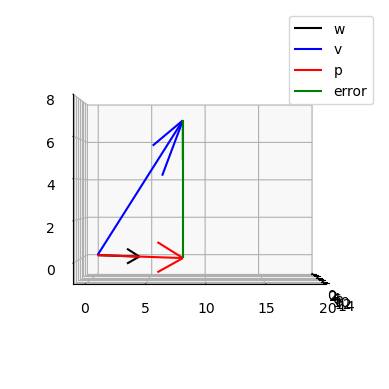

Check projection error orthogonal to w 
[[0.]]


In [2]:
# v is the vector to be projected
v = np.array([[6], [8], [7]], dtype=np.float64)
# w is the vector we are projecting onto
w = np.array([[3], [4], [0]], dtype=np.float64)

def proj_vector(w, v):
  """
  Calculates the projection of vector v onto vector w.
  """
  # Calculate the projection matrix: P_w = (w * w.T) / (w.T * w)
  # np.linalg.norm(w)**2 is equivalent to w.T @ w (dot product)
  P_w = np.dot(w, w.T) / (np.linalg.norm(w)*np.linalg.norm(w))
  
  # Calculate the projection vector: p = P_w * v
  p = P_w @ v 
  return p

# Calculate the projection
p_1 = proj_vector(w, v)

import matplotlib.pyplot as plt

def plot_3D_vec(w, v, p):
  """
  Helper function to visualize the vectors in 3D.
  """
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  # Set plot limits
  ax.set_xlim(-1, 15)
  ax.set_ylim(-1, 20)
  ax.set_zlim(-1, 8)

  O = [0, 0, 0] # Origin
  # Draw vector w (black)
  ax.quiver(O[0], O[1], O[2], w[0], w[1], w[2], label='w', color = 'black')
  # Draw vector v (blue)
  ax.quiver(O[0], O[1], O[2], v[0], v[1], v[2], label='v', color = 'blue')
  # Draw the projection p (red)
  ax.quiver(O[0], O[1], O[2], p[0], p[1], p[2], label='p', color = 'red')
  # Draw the error vector (v - p) (green), which should be orthogonal to w
  ax.quiver(p[0], p[1], p[2], v[0]-p[0], v[1]-p[1], v[2]-p[2], label='error', color= 'green')
  
  ax.view_init(0, 0) # Set a specific viewing angle
  plt.legend()
  plt.show()

# Plot the vectors
plot_3D_vec(w, v, p_1)

#### check the crucial property of the projection #####################
# The error vector (v - p) must be orthogonal to the vector w.
# We check this by computing their dot product, which should be 0.
def check_proj_vec(w, v, p):
  """
  Numerically checks if the error vector (v - p) is orthogonal to w.
  """
  # Calculate the dot product w.T @ (v - p).
  # The result should be very close to zero.
  res = np.dot(w.T, v - p)
  return res

print("Check projection error orthogonal to w ")
print(check_proj_vec(w, v, p_1))

In [3]:
# A is the matrix whose column space we will project onto
A = np.array([[1, 0], [2, 1], [0, 1]], dtype=np.float64)

def proj_matrix(A, v):
  """
  Calculates the projection of vector v onto the column space of matrix A.
  """
  # Calculate the projection matrix: P_A = A * (A.T * A)^-1 * A.T
  P_A = A @ np.linalg.inv(A.T @ A) @ A.T
  # Calculate the projection vector: p = P_A * v
  p = P_A @ v 
  return p

# Calculate the projection
p_2 = proj_matrix(A, v)

#### check the crucial property of the projection #####################
# The error vector (v - p) must be orthogonal to the column space of A.
# This is true if A.T @ (v - p) is a zero vector.
def check_proj_matrix(A, v, p):
  """
  Numerically checks if the error (v-p) is orthogonal to col(A).
  """
  # Calculate the norm of A.T @ (v - p). This should be close to 0.
  numerator = np.linalg.norm(np.dot(A.T, v - p))
  # Normalize by the other norms for a stable numerical check
  denomerator = np.linalg.norm(A, 'fro') * np.linalg.norm(v)
  return numerator / denomerator

print("Check projection error orthogonal to Col(A) ")
print(check_proj_matrix(A, v, p_2))

Check projection error orthogonal to Col(A) 
4.957922606020533e-17


**QR factorization for matrix with independent columns**

In [4]:
# Define the matrix A to be factored
A = np.array([[1, 2, 0], [0, 1, 1], [1, 0, 1]], dtype=np.float64)

def QR(A):
  """
  Performs QR factorization on matrix A using the 
  modified Gram-Schmidt algorithm.
  A = QR, where Q has orthonormal columns and R is upper triangular.
  """
  m, n = A.shape
  Q = np.zeros((m, n))
  R = np.zeros((n, n))

  # Iterate through each column i of A
  for i in range(n):
      # Start with the i-th column of A
      v = A[:, i].copy() # Use .copy() to avoid modifying A

      # Subtract projections onto previous orthogonal vectors (columns of Q)
      for k in range(i):
          # R[k, i] is the coefficient of projection of A[:,i] onto Q[:,k]
          R[k, i] = np.dot(Q[:, k], A[:, i]) 
          # Subtract the projection from v
          v = v - R[k, i] * Q[:, k]
      
      # Now, v is orthogonal to all previous Q columns.
      # Normalize v. The norm is the diagonal element R[i, i].
      R[i, i] = np.linalg.norm(v)
      # The i-th orthonormal vector is v / norm(v)
      Q[:, i] = v / R[i, i]

  return Q, R

Q, R = QR(A)

print("QR Factorization of A:")
print("Q:")
print(Q)
print("\nR:")
print(R)

QR Factorization of A:
Q:
[[ 0.70710678  0.57735027 -0.40824829]
 [ 0.          0.57735027  0.81649658]
 [ 0.70710678 -0.57735027  0.40824829]]

R:
[[1.41421356e+00 1.41421356e+00 7.07106781e-01]
 [0.00000000e+00 1.73205081e+00 2.22044605e-16]
 [0.00000000e+00 0.00000000e+00 1.22474487e+00]]


In [5]:
# Define a second, larger matrix B
B = np.array([[0.488894, 0.888396, 0.325191, 0.319207],
              [1.03469, -1.14707, -0.754928, 0.312859],
              [0.726885, -1.06887, 1.3703, -0.86488],
              [-0.303441, -0.809499, -1.71152, -0.0300513],
              [0.293871, -2.94428, -0.102242, -0.164879],
              [-0.787283, 1.43838, -0.241447, 0.627707]], dtype=np.float64)

# Factorize B
Q_1, R_1 = QR(B)


print("QR Factorization of B:")
print("Q_1:")
# Q_1 should have orthonormal columns, meaning Q_1.T @ Q_1 is the identity matrix
print(Q_1) 
print("\nR_1:")
# R_1 should be an upper-triangular matrix
print(R_1)

QR Factorization of B:
Q_1:
[[ 0.30110946  0.46074898 -0.09409473  0.24498921]
 [ 0.63726483  0.0433632  -0.55860084  0.25120018]
 [ 0.44768795 -0.05049669  0.51979706 -0.41105066]
 [-0.18688909 -0.36541282 -0.61795518 -0.48979285]
 [ 0.18099494 -0.79362948  0.16394286  0.49211145]
 [-0.48488703  0.14108795 -0.01328287  0.47523194]]

R_1:
[[ 1.6236421  -2.02106819  0.64872948 -0.42029906]
 [ 0.          3.24896812  0.72038807  0.4347103 ]
 [ 0.          0.          2.14747048 -0.6711592 ]
 [ 0.          0.          0.          0.74418848]]
